# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"

### Step 3. Assign it to a variable apple * combine steps 2 and 3

In [3]:
apple = pd.read_csv(url)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [6]:
apple["Date"] = pd.to_datetime(apple["Date"])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [8]:
apple = apple.set_index("Date")
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [10]:
# No
apple.index.has_duplicates

False

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [23]:
apple.sort_index(ascending=True, inplace=True)

### Step 9. Get the last business day of each month

In [67]:
# as df is now sorted from oldest to most recent, last day of each month will be
# last row (tail) of each group dataframe
#apple.groupby(apple.index.month, group_keys=False).apply(lambda x: x.tail(1)).index.day

# alternatively, more naturally, and the prices are averages for the month
apple.resample('BM').mean()

,Open,High,Low,Close,Volume,Adj Close,return
Date,,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077,NaN
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810,NaN
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053,NaN
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727,NaN
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333,0.146603
...,...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000,NaN
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143,0.088018
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571,0.073402


### Step 10.  What is the difference in days between the first day and the oldest

In [69]:
# 12261 days
days = apple.index
abs(days[-1] - days[0])
# more clear:
(days.max() - days.min()).days

12261

### Step 11.  How many months in the data we have?

In [71]:
# groupby year, month, find no. of unique groups
# 404 months
apple.groupby([apple.index.year, apple.index.month]).ngroups

# alternatively, len instead of .shape[0]
apple.resample('BM').mean().shape[0]

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

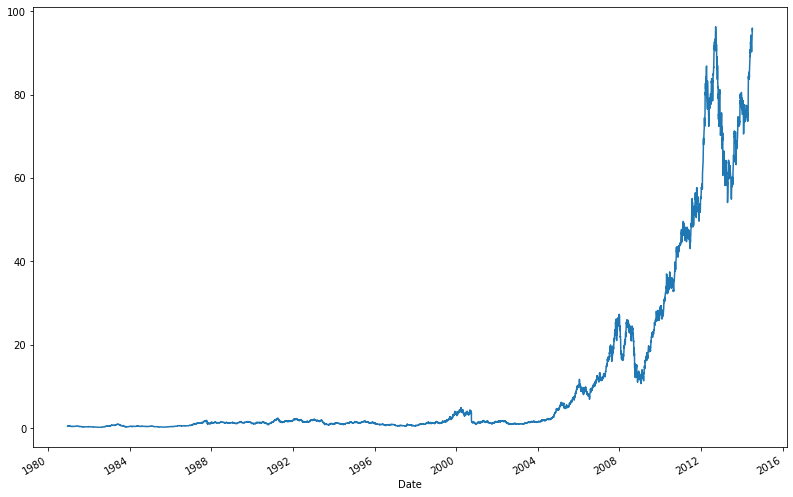

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13.5, 9))
fig.patch.set_facecolor('white')  # set axes to white
apple["Adj Close"].plot();

### BONUS: Create your own question and answer it.
Plot the yearly rolling average for the average monthly continuously compounded return.

In [62]:
import numpy as np

monthly_price = apple["Adj Close"].asfreq('MS', method='pad')
monthly_return = np.log(monthly_price.shift(-1)/monthly_price)
monthly_return


Date
1981-01-01   -0.186102
1981-02-01   -0.070618
1981-03-01   -0.075986
1981-04-01    0.146603
1981-05-01    0.167054
                ...   
2014-03-01    0.028873
2014-04-01    0.088018
2014-05-01    0.073402
2014-06-01    0.033599
2014-07-01         NaN
Freq: MS, Name: Adj Close, Length: 403, dtype: float64

In [64]:
roll_yearly = monthly_return.rolling(12, center=True)
roll_yearly

Rolling [window=12,center=True,axis=0,method=single]

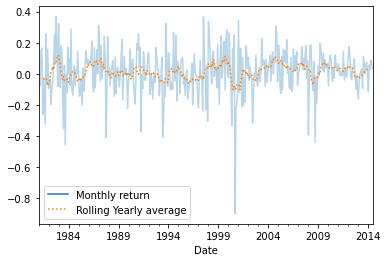

In [65]:
data = pd.DataFrame({'Monthly return': monthly_return, 'Rolling Yearly average': roll_yearly.mean()})
ax = data.plot(style=['-', ':'])
ax.patch.set_facecolor('white')
ax.lines[0].set_alpha(0.3)